# Epigenome data

We will analyse histone-ChIP-seq (H3K27Ac) and ATAC-seq data, related to TP53 activation.

The following publicly available record at GEO contains several epigenomic data sets related to TP53 activation. The treatment is similar to our previous case study, using nutlin-3a. However, here they used IMR90 normal cells, compared to our MCF-7 breast cancer cells we used previously.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE58740



Downloaded bigWig files can be opened in IGV: (note: if the data is available on chip-atlas.org, you can view the bigWig directly in IGV without downloading; use the View in IGV option on the chip-atlas.org webpage).



The peak near BBC3 does not show obvious changes in ATAC nor H3K27Ac between DMSO-treated versus nutlin-treated IMR90 cells.

However, the tracks are autoscaled, and when we zoom out, we do see a small increase in H3K27Ac after nutlin-3a.
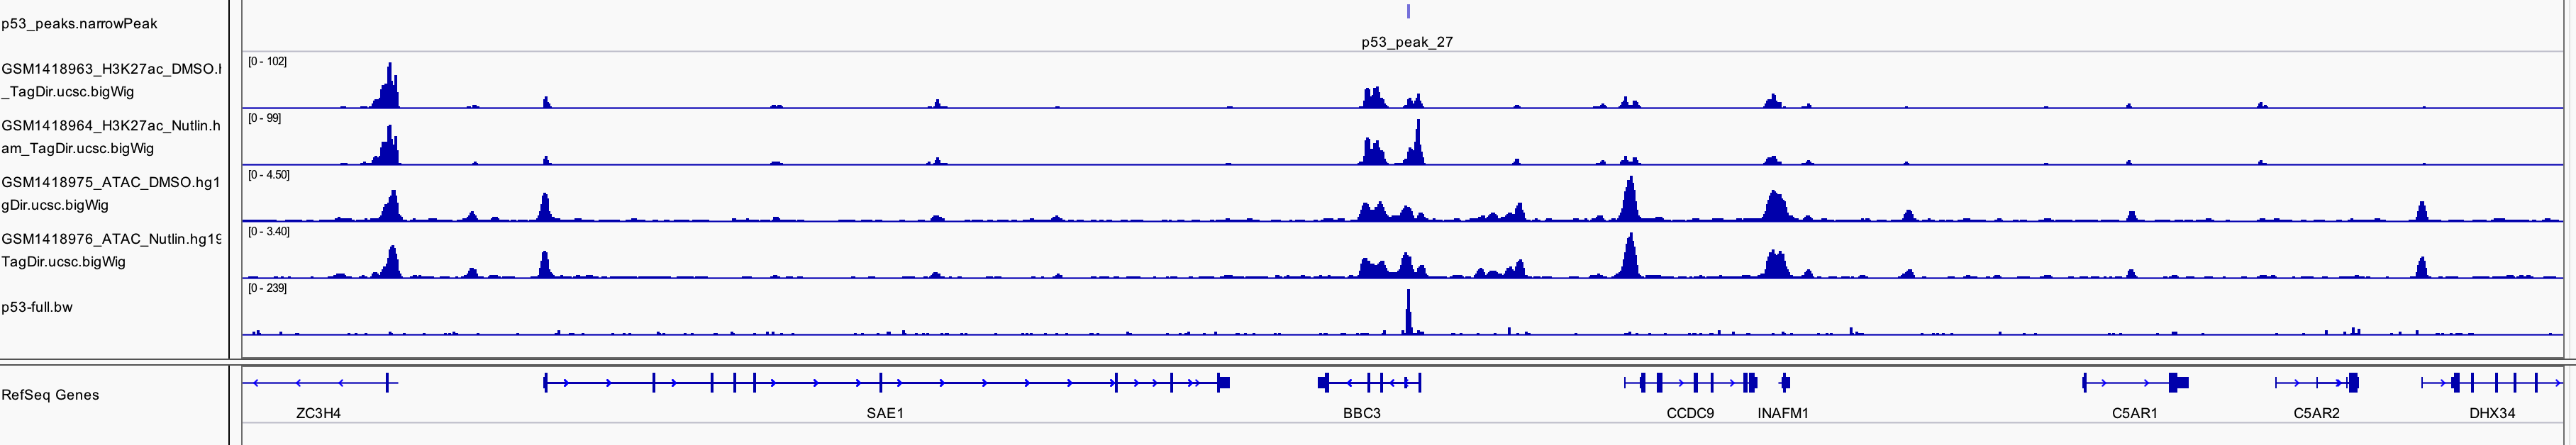

To view the data in the UCSC Genome Browser, you can make custom tracks with the bigWig files. This only works if the bigWig files are available from a URL. For this dataset, they have made the bigWig files available at GEO. Copy the URL of the FTP link

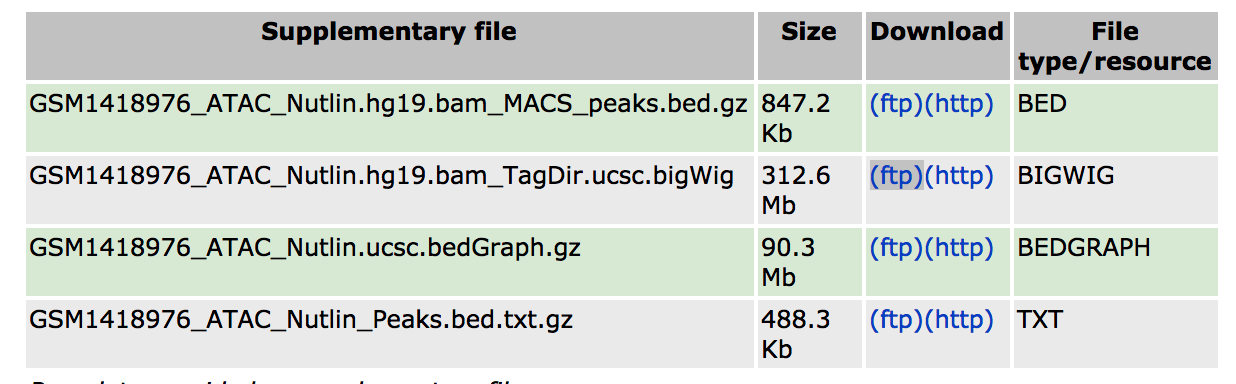

Simply paste that URL in the custom track box



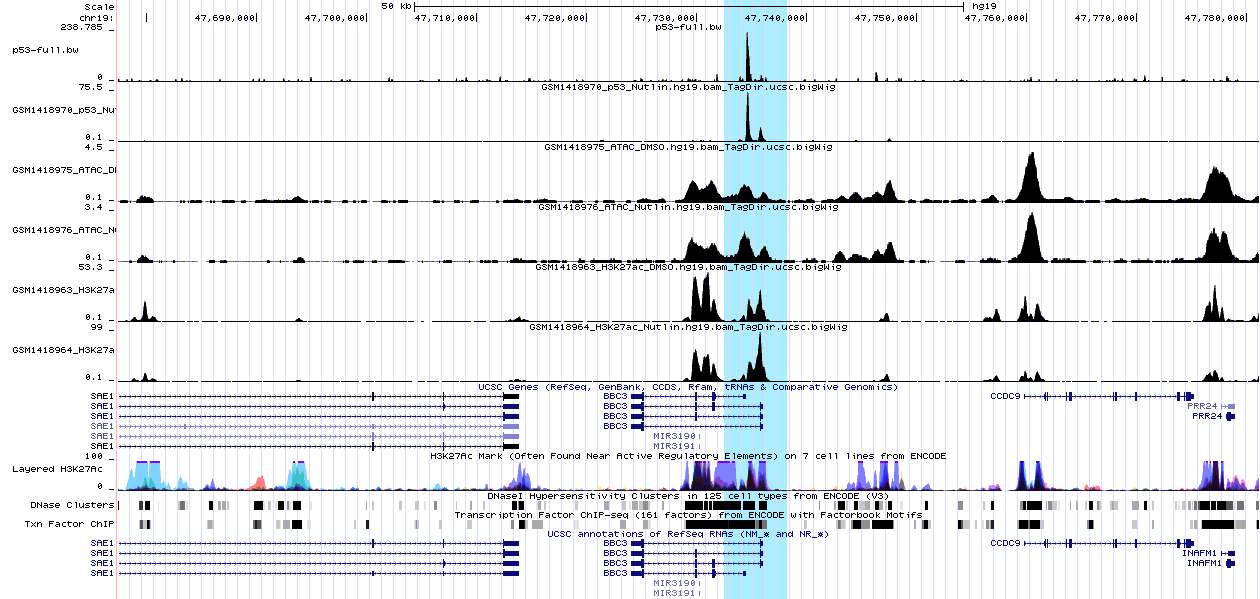

The two upper tracks contain our ChIP-seq data from the previous session, in MCF-7 cells after nutlin-3a treatment, and the TP53 ChIP-seq data in IMR90 cells after nutlin-3a.

## Visualize H3K27Ac ChIP-seq data and ATAC-seq data on the TP53 ChIP-seq peaks

After downloading the bigWig files (you don't have to do this for this exercise, we already downloaded them)

In [1]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/chipseq/
cd /mnt/storage/$USER/jupyternotebooks/chipseq/

Creat a symbolic link to the bigWig files on the server

In [2]:
ln -sf /mnt/storage/data/chipseq/chromatin/*.bigWig .

In [3]:
ls -lt *.bigWig

lrwxrwxrwx 1 u0038182 domain users 87 Sep 25 18:05 GSM1418963_H3K27ac_DMSO.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418963_H3K27ac_DMSO.hg19.bam_TagDir.ucsc.bigWig
lrwxrwxrwx 1 u0038182 domain users 89 Sep 25 18:05 GSM1418964_H3K27ac_Nutlin.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418964_H3K27ac_Nutlin.hg19.bam_TagDir.ucsc.bigWig
lrwxrwxrwx 1 u0038182 domain users 84 Sep 25 18:05 GSM1418975_ATAC_DMSO.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418975_ATAC_DMSO.hg19.bam_TagDir.ucsc.bigWig
lrwxrwxrwx 1 u0038182 domain users 86 Sep 25 18:05 GSM1418976_ATAC_Nutlin.hg19.bam_TagDir.ucsc.bigWig -> /mnt/storage/data/chipseq/chromatin/GSM1418976_ATAC_Nutlin.hg19.bam_TagDir.ucsc.bigWig


Also create a link to the p53_peaks.narrowPeak, which contains all p53 peaks (from the entire genome; we have created this using macs2 callpeak)

In [4]:
ls -lt /mnt/storage/data/chipseq/p53/*.narrowPeak

-rw-r--r-- 1 u0038182 teachers 50433 Sep 25 16:09 /mnt/storage/data/chipseq/p53/p53-full_peaks.narrowPeak
-rw-rw-r-- 1 u0038182 teachers  3224 Oct 20  2015 /mnt/storage/data/chipseq/p53/test_peaks.narrowPeak


In [6]:
ln -sf /mnt/storage/data/chipseq/p53/p53-full_peaks.narrowPeak .

In [7]:
wc -l p53-full_peaks.narrowPeak

657 p53-full_peaks.narrowPeak


Create a BED file from the narrowpeak file:

In [8]:
cat p53-full_peaks.narrowPeak | cut -f 1-3 | head

chr1	8925386	8925636
chr1	9241975	9242475
chr1	12267182	12267459
chr1	23919094	23919386
chr1	24020156	24020406
chr1	29565827	29566077
chr1	40538858	40539110
chr1	41947946	41948333
chr1	42998891	42999259
chr1	45265364	45265888
cut: write error: Broken pipe


In [9]:
cat p53-full_peaks.narrowPeak | cut -f 1-3 > p53-all_peaks.bed

We will use the deeptools commands to generate a heatmap, see here for more info: https://deeptools.readthedocs.io/en/develop/content/tools/plotHeatmap.html

In [10]:
computeMatrix scale-regions \
    -S GSM1418963_H3K27ac_DMSO.hg19.bam_TagDir.ucsc.bigWig GSM1418964_H3K27ac_Nutlin.hg19.bam_TagDir.ucsc.bigWig \
    -R p53-all_peaks.bed \
    -a 2000 \
    -b 2000 \
    -out p53-peaks-H3K27Ac.tab.gz

In [11]:
plotHeatmap \
    -m p53-peaks-H3K27Ac.tab.gz \
    -out p53-peaks-H3K27Ac.png \
    --heatmapHeight 15 \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq H3K27Ac signal'

In [12]:
ls -lt *.png

-rw-r--r-- 1 u0038182 domain users 325462 Sep 25 18:09 p53-peaks-H3K27Ac.png
-rw-r--r-- 1 u0038182 domain users 166267 Sep 25 16:43 p53-peaks5.png


We observe an increase in H3K27Ac on the TP53 ChIP-seq peaks, after treating with nutlin-3a, indicating that these regions become active enhancers (because TP53 now binds there and activates a target genes).

Note that many regions have no H3K27Ac signal !

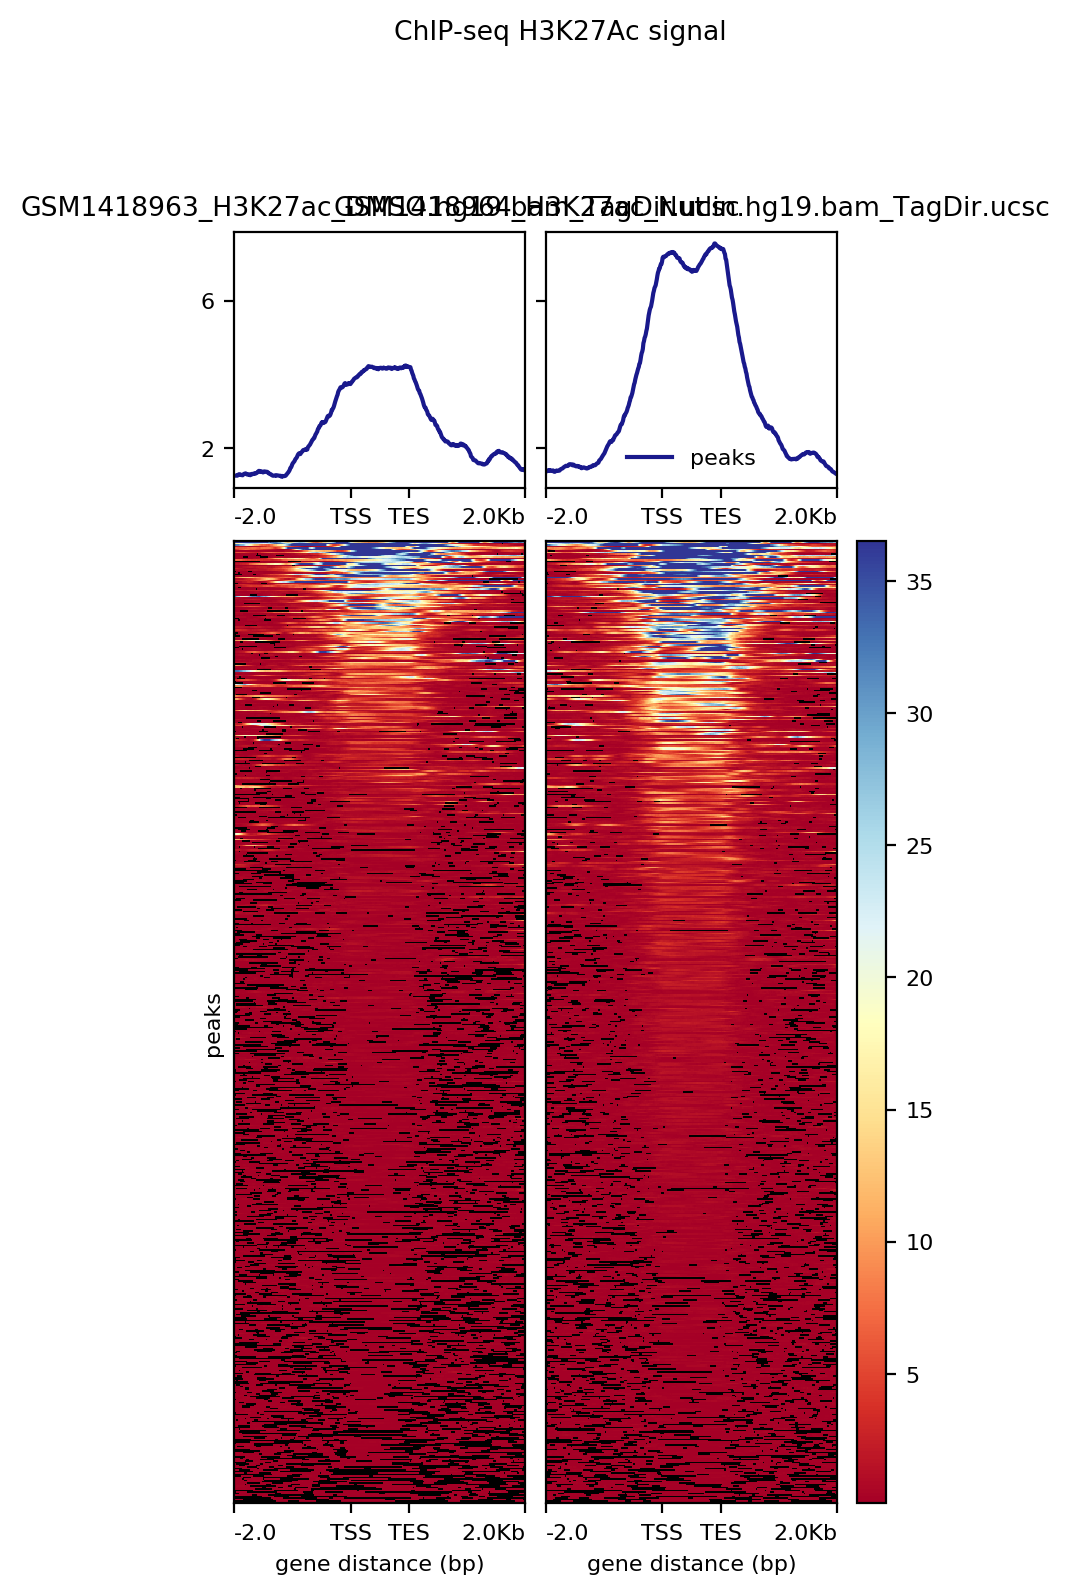{width=100px}

## ATAC-seq

In [13]:
computeMatrix scale-regions \
    -S GSM1418975_ATAC_DMSO.hg19.bam_TagDir.ucsc.bigWig GSM1418976_ATAC_Nutlin.hg19.bam_TagDir.ucsc.bigWig \
    -R p53-all_peaks.bed \
    -a 2000 \
    -b 2000 \
    -out p53-peaks-ATAC.tab.gz

In [14]:
plotHeatmap \
    -m p53-peaks-ATAC.tab.gz \
    -out p53-peaks-ATAC.png \
    --heatmapHeight 15 \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ATAC-seq H3K27Ac signal'

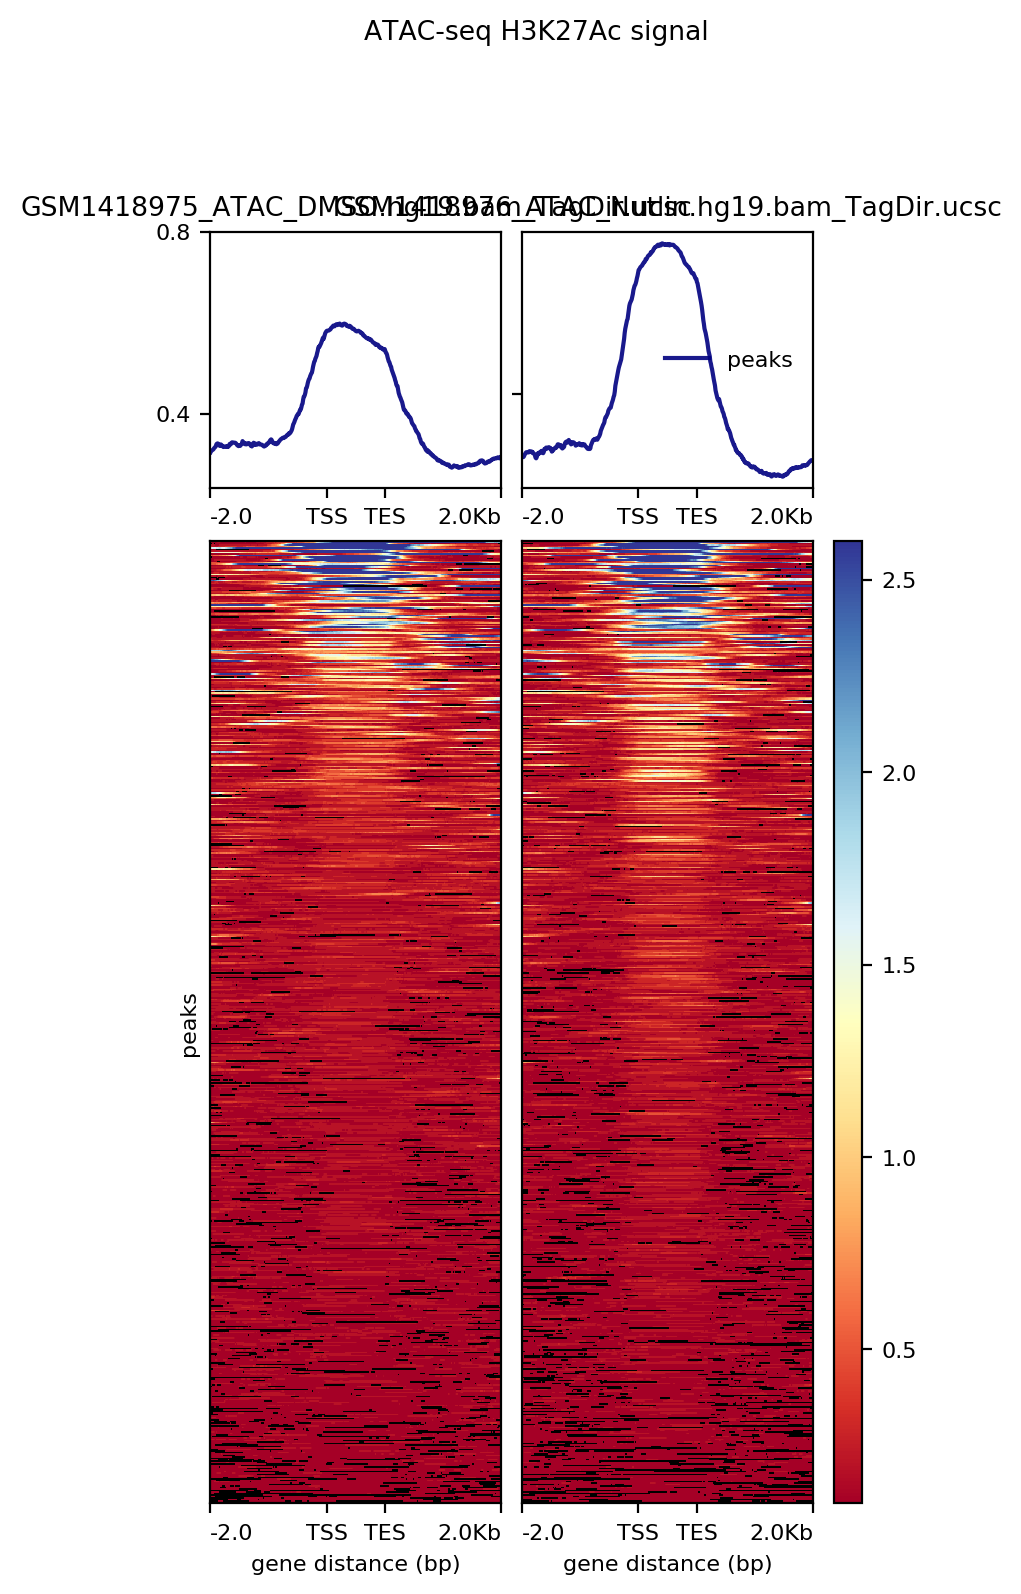

## Find differential H3K27Ac signal, genome-wide

https://github.com/taoliu/MACS/wiki/Call-differential-binding-events

For differential activity, we need the BAM files. In your project, this requires downloading the FASTQ data from SRA, and aligning the reads to the genome, for example using bowtie.

You can find the SRR accession number by following the link to SRA from the GEO page.



In [36]:
#fastq-dump -O /mnt/storage/data/chipseq/chromatin/ SRR1448781

Read 54520169 spots for SRR1448781
Written 54520169 spots for SRR1448781


In [39]:
#bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 /mnt/storage/data/chipseq/chromatin/SRR1448781.fastq -S ChIP_H3K27Ac_Nutlin.sam

Mapping with the minimap algorithm goes much faster than bowtie


In [40]:
#minimap2 -a -x sr /mnt/storage/data/resources/hg19/hg19.fa SRR1448781.fastq.gz > SRR1448781.sam

: 130

We will use only the reads that map to chr19 for this exercise

In [15]:
ln -sf /mnt/storage/data/chipseq/chromatin/H3k27ac/*chr19*.bam .

In [16]:
ls -lt *chr19*.bam

lrwxrwxrwx 1 u0038182 domain users       92 Sep 25 18:17 ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam
lrwxrwxrwx 1 u0038182 domain users       93 Sep 25 18:17 ChIP_H3K27ac__DMSO__SRR1448780.chr19.minimap2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_H3K27ac__DMSO__SRR1448780.chr19.minimap2.bam
lrwxrwxrwx 1 u0038182 domain users       96 Sep 25 18:17 ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam
lrwxrwxrwx 1 u0038182 domain users       97 Sep 25 18:17 ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.minimap2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.minimap2.bam
lrwxrwxrwx 1 u0038182 domain users       90 Sep 25 18:17 ChIP_Input__DMSO__SRR1448788.chr19.bowtie2.bam -> /mnt/storage/data/chipseq/chromatin/H3k27ac/ChIP_Input__DMSO__SRR

In [17]:
macs2 predictd -i ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam

INFO  @ Wed, 25 Sep 2019 18:18:10: # read alignment files... 
INFO  @ Wed, 25 Sep 2019 18:18:10: # read treatment tags... 
INFO  @ Wed, 25 Sep 2019 18:18:10: Detected format is: BAM 
INFO  @ Wed, 25 Sep 2019 18:18:10: * Input file is gzipped. 
INFO  @ Wed, 25 Sep 2019 18:18:13:  1000000 
INFO  @ Wed, 25 Sep 2019 18:18:14: tag size is determined as 100 bps 
INFO  @ Wed, 25 Sep 2019 18:18:14: # tag size = 100 
INFO  @ Wed, 25 Sep 2019 18:18:14: # total tags in alignment file: 1582027 
INFO  @ Wed, 25 Sep 2019 18:18:14: # Build Peak Model... 
INFO  @ Wed, 25 Sep 2019 18:18:14: #2 looking for paired plus/minus strand peaks... 
INFO  @ Wed, 25 Sep 2019 18:18:15: #2 number of paired peaks: 23995 
INFO  @ Wed, 25 Sep 2019 18:18:15: start model_add_line... 
INFO  @ Wed, 25 Sep 2019 18:18:15: start X-correlation... 
INFO  @ Wed, 25 Sep 2019 18:18:15: end of X-cor 
INFO  @ Wed, 25 Sep 2019 18:18:15: # finished! 
INFO  @ Wed, 25 Sep 2019 18:18:15: # predicted fragment length is 297 bps 
INFO  @ W

In [18]:
macs2 predictd -i ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam

INFO  @ Wed, 25 Sep 2019 18:18:23: # read alignment files... 
INFO  @ Wed, 25 Sep 2019 18:18:23: # read treatment tags... 
INFO  @ Wed, 25 Sep 2019 18:18:23: Detected format is: BAM 
INFO  @ Wed, 25 Sep 2019 18:18:23: * Input file is gzipped. 
INFO  @ Wed, 25 Sep 2019 18:18:25:  1000000 
INFO  @ Wed, 25 Sep 2019 18:18:27: tag size is determined as 100 bps 
INFO  @ Wed, 25 Sep 2019 18:18:27: # tag size = 100 
INFO  @ Wed, 25 Sep 2019 18:18:27: # total tags in alignment file: 1602586 
INFO  @ Wed, 25 Sep 2019 18:18:27: # Build Peak Model... 
INFO  @ Wed, 25 Sep 2019 18:18:27: #2 looking for paired plus/minus strand peaks... 
INFO  @ Wed, 25 Sep 2019 18:18:27: #2 number of paired peaks: 21977 
INFO  @ Wed, 25 Sep 2019 18:18:27: start model_add_line... 
INFO  @ Wed, 25 Sep 2019 18:18:27: start X-correlation... 
INFO  @ Wed, 25 Sep 2019 18:18:27: end of X-cor 
INFO  @ Wed, 25 Sep 2019 18:18:27: # finished! 
INFO  @ Wed, 25 Sep 2019 18:18:27: # predicted fragment length is 296 bps 
INFO  @ W

Predicted fragment sizes are 297bp and 296bp

In [19]:
macs2 callpeak -B -t ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam -n nutlin --nomodel --extsize 300

INFO  @ Wed, 25 Sep 2019 18:18:41: 
# Command line: callpeak -B -t ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam -n nutlin --nomodel --extsize 300
# ARGUMENTS LIST:
# name = nutlin
# format = AUTO
# ChIP-seq file = ['ChIP_H3K27ac__Nutlin3a__SRR1448781.chr19.bowtie2.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Wed, 25 Sep 2019 18:18:41: #1 read tag files... 
INFO  @ Wed, 25 Sep 2019 18:18:41: #1 read treatment tags... 
INFO  @ Wed, 25 Sep 2019 18:18:41: Detected format is: BAM 
INFO  @ Wed, 25 Sep 2019 18:18:41: * Input file is gzipped. 
INFO  @ Wed, 25 Sep 2019 18:18:43:  1000000 
INFO  @ Wed, 25 Sep 2019 18:18:44: #1 tag size is determined as 100 bps 
INFO  @ Wed, 25 Sep 2019 18:18:44: #1 tag size = 100 
INFO  @ Wed, 25

In [20]:
macs2 callpeak -B -t ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam -n DMSO --nomodel --extsize 300

INFO  @ Wed, 25 Sep 2019 18:19:03: 
# Command line: callpeak -B -t ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam -n DMSO --nomodel --extsize 300
# ARGUMENTS LIST:
# name = DMSO
# format = AUTO
# ChIP-seq file = ['ChIP_H3K27ac__DMSO__SRR1448780.chr19.bowtie2.bam']
# control file = None
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Wed, 25 Sep 2019 18:19:03: #1 read tag files... 
INFO  @ Wed, 25 Sep 2019 18:19:03: #1 read treatment tags... 
INFO  @ Wed, 25 Sep 2019 18:19:03: Detected format is: BAM 
INFO  @ Wed, 25 Sep 2019 18:19:03: * Input file is gzipped. 
INFO  @ Wed, 25 Sep 2019 18:19:06:  1000000 
INFO  @ Wed, 25 Sep 2019 18:19:07: #1 tag size is determined as 100 bps 
INFO  @ Wed, 25 Sep 2019 18:19:07: #1 tag size = 100 
INFO  @ Wed, 25 Sep 2019 18

In [21]:
egrep "tags after filtering in treatment|tags after filtering in control" nutlin_peaks.xls

# tags after filtering in treatment: 1193531


In [22]:
egrep "tags after filtering in treatment|tags after filtering in control" DMSO_peaks.xls

# tags after filtering in treatment: 1187185


In [23]:
ls -lt *.bdg

-rw-r--r-- 1 u0038182 domain users 67240459 Sep 25 18:19 DMSO_control_lambda.bdg
-rw-r--r-- 1 u0038182 domain users 56524561 Sep 25 18:19 DMSO_treat_pileup.bdg
-rw-r--r-- 1 u0038182 domain users 68106938 Sep 25 18:18 nutlin_control_lambda.bdg
-rw-r--r-- 1 u0038182 domain users 58239596 Sep 25 18:18 nutlin_treat_pileup.bdg


In [24]:
macs2 bdgdiff \
    --t1 nutlin_treat_pileup.bdg \
    --c1 nutlin_control_lambda.bdg \
    --t2 DMSO_treat_pileup.bdg \
    --c2 DMSO_control_lambda.bdg \
    --d1 1193531 \
    --d2 1187185 \
    -g 60 \
    -l 120 \
    --o-prefix diff_nutlin_vs_DMSO

INFO  @ Wed, 25 Sep 2019 18:20:24: Read and build treatment 1 bedGraph... 
INFO  @ Wed, 25 Sep 2019 18:20:25: Read and build control 1 bedGraph... 
INFO  @ Wed, 25 Sep 2019 18:20:27: Read and build treatment 2 bedGraph... 
INFO  @ Wed, 25 Sep 2019 18:20:28: Read and build control 2 bedGraph... 
INFO  @ Wed, 25 Sep 2019 18:20:36: Write peaks... 
INFO  @ Wed, 25 Sep 2019 18:20:36: Done 


In [25]:
ls -lt *.bed | head

-rw-r--r-- 1 u0038182 domain users 143462 Sep 25 18:20 diff_nutlin_vs_DMSO_c3.0_common.bed
-rw-r--r-- 1 u0038182 domain users  13250 Sep 25 18:20 diff_nutlin_vs_DMSO_c3.0_cond1.bed
-rw-r--r-- 1 u0038182 domain users  23147 Sep 25 18:20 diff_nutlin_vs_DMSO_c3.0_cond2.bed
-rw-r--r-- 1 u0038182 domain users 104622 Sep 25 18:19 DMSO_summits.bed
-rw-r--r-- 1 u0038182 domain users 110655 Sep 25 18:18 nutlin_summits.bed
-rw-r--r-- 1 u0038182 domain users  15640 Sep 25 18:08 p53-all_peaks.bed
-rw-r--r-- 1 u0038182 domain users  15640 Sep 25 16:34 p53-full_peaks.bed


In [27]:
cat diff_nutlin_vs_DMSO_c3.0_cond1.bed | sort -k 5,5gr | head

chr19	4972565	4973072	diff_nutlin_vs_DMSO_cond1_33	57.01951
chr19	44263172	44263832	diff_nutlin_vs_DMSO_cond1_157	52.49476
chr19	47722004	47722144	diff_nutlin_vs_DMSO_cond1_183	41.75992
chr19	41767439	41768428	diff_nutlin_vs_DMSO_cond1_136	41.35392
chr19	9733159	9733453	diff_nutlin_vs_DMSO_cond1_50	36.53617
chr19	46135221	46135928	diff_nutlin_vs_DMSO_cond1_172	34.97065
chr19	2189272	2189666	diff_nutlin_vs_DMSO_cond1_15	31.86173
chr19	52599344	52599788	diff_nutlin_vs_DMSO_cond1_201	31.25960
chr19	59107399	59109342	diff_nutlin_vs_DMSO_cond1_215	29.67731
chr19	41724302	41724699	diff_nutlin_vs_DMSO_cond1_135	28.34232


We analyzed only chr19, but even if we put these nutlin-H3K27Ac enriched regions in i-cisTarget for motif discovery, the TP53 motif is found as top enriched !
* here is the i-cistarget output: https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget-mcv8/reports/2e253acc402b8374d8f03073d4e5331bdaf280e2/report.html
* this means that TP53 activation, which results in (increased) TP53 binding to its binding sites, induces enhancer activity (and target gene activation)
* this means that we can find TP53 binding sites without ChIP-seq, so we do not have to know a priori which TF is regulating our process !
* About 25 of the enriched regions have a strong TP53 binding site

These are the 26 predicted targets regions (and we get the nearby located gene):

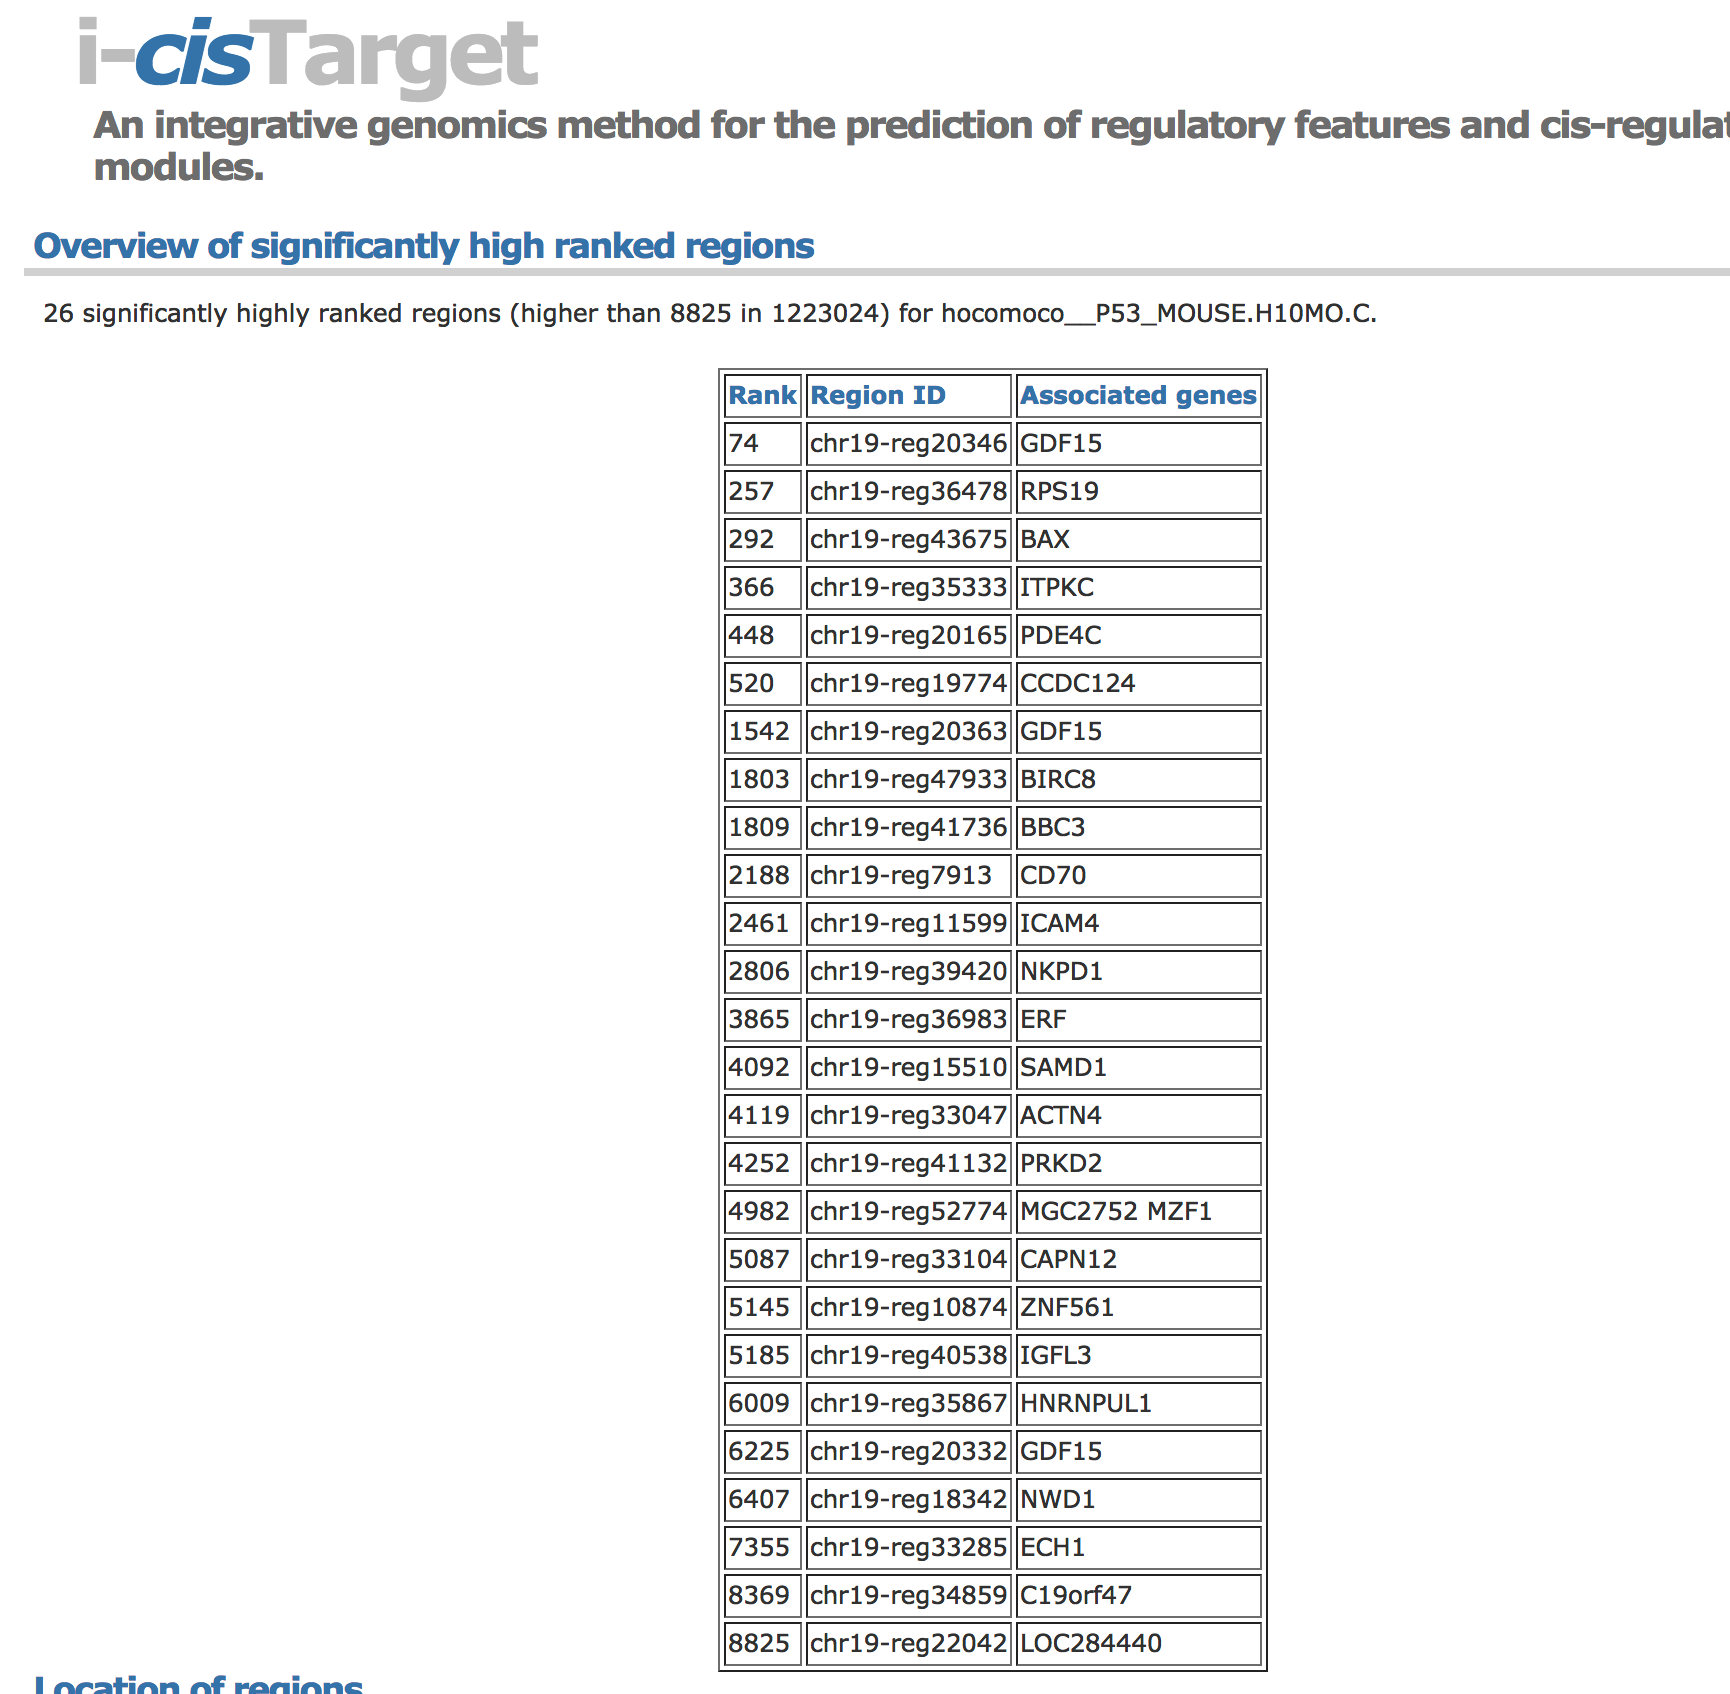

Let's look at BAX, we can indeed see the (small) increase in H3K27Ac signal - and importantly, it overlaps with the ChIP-seq peak. This is quite a sensitive technique!

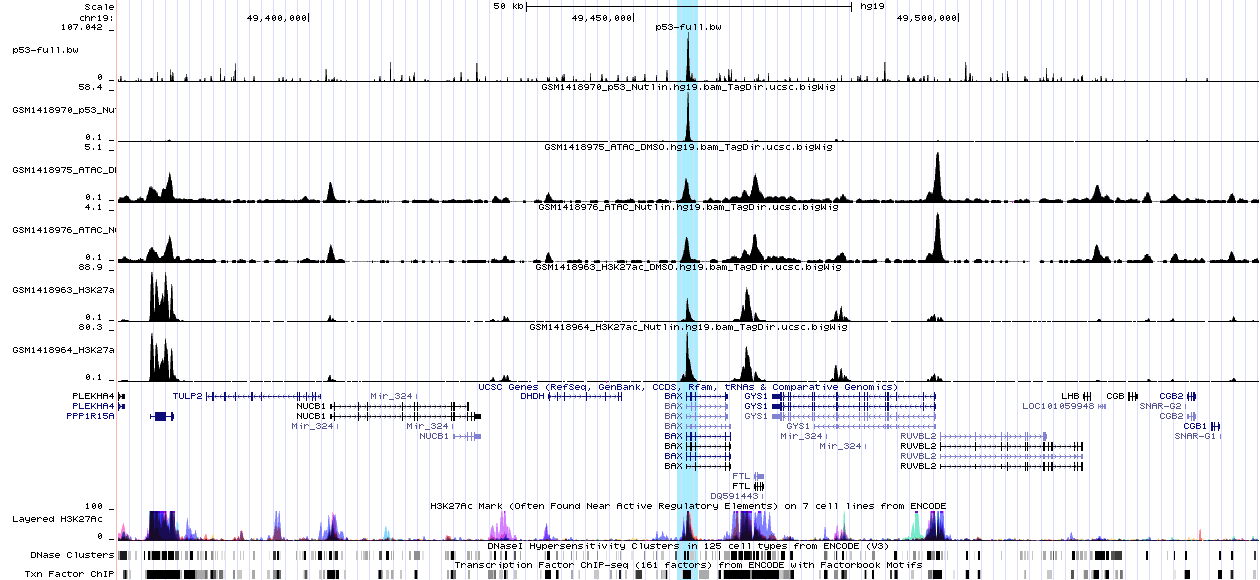

We have run this bdgdiff analysis for the entire genome.